In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes  import BernoulliNB
import nltk# FOR TEXT PROCESSING
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer#TEXT PROCESSING
import missingno as mns# CHECKING FOR MISSING
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Simeon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

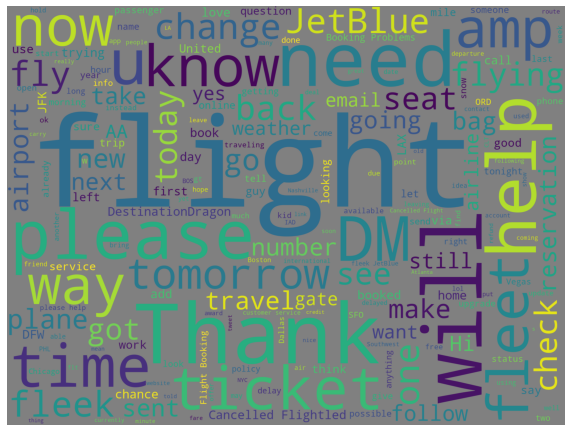

In [5]:
new_data = df[df['airline_sentiment'] == 'neutral']
words = ' '.join(new_data['text'])
cleaned_word = ' '.join([word for word in words.split()
                    if 'http' not in word and  not word.startswith('@')
                    and word !='RT'])
wordcloud = WordCloud(stopwords =STOPWORDS,
                      background_color ='gray',
                      width = 2000,
                      height=1500).generate(cleaned_word)
plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

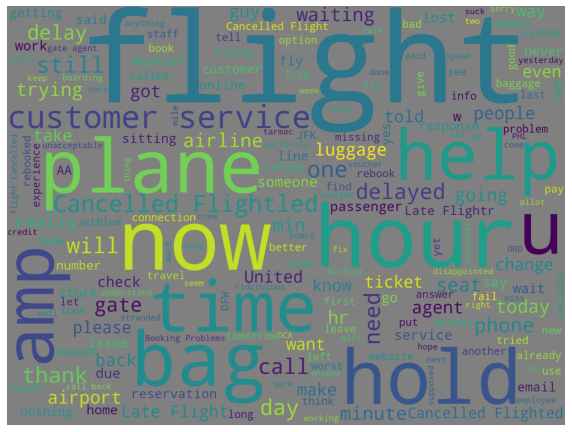

In [6]:
new_data = df[df['airline_sentiment'] == 'negative']
words = ' '.join(new_data['text'])
cleaned_word = ' '.join([word for word in words.split()
                    if 'http' not in word and  not word.startswith('@')
                    and word !='RT'])
wordcloud = WordCloud(stopwords =STOPWORDS,
                      background_color ='gray',
                      width = 2000,
                      height=1500).generate(cleaned_word)
plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

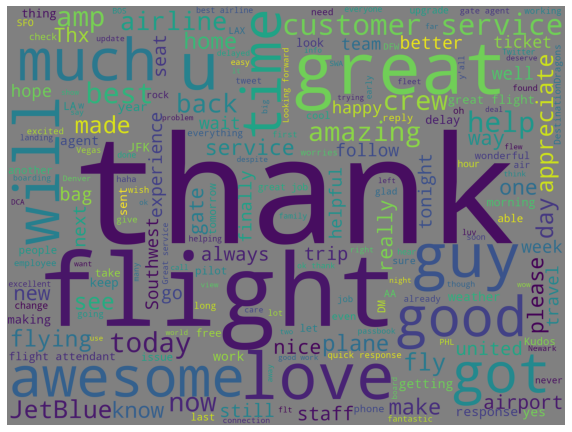

In [7]:
new_data = df[df['airline_sentiment'] == 'positive']
words = ' '.join(new_data['text'])
cleaned_word = ' '.join([word for word in words.split()
                    if 'http' not in word and  not word.startswith('@')
                    and word !='RT'])
wordcloud = WordCloud(stopwords =STOPWORDS,
                      background_color ='gray',
                      width = 2000,
                      height=1500).generate(cleaned_word)
plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [10]:
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
stop_words = stopwords.words('english')
def preprocess(x, stem =False):
    x = re.sub(text_cleaning_re,' ',str(x).lower()).strip()
    tokens = []
    for token in x.split('\n'):
        if token not in stop_words:
            if stem:
                tokens.append(SnowballStemmer.stem(token))
            else:
                tokens.append(token)
            return ' '.join(tokens)
df.text = df.text.apply(lambda x:preprocess(x))

In [18]:
X = df.text
y = df['airline_sentiment']
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)

In [19]:
import xgboost as xgb

In [22]:
model1 = Pipeline([('vectorizer',CountVectorizer()),('transfor',TfidfTransformer()),('clf',BernoulliNB())])
model2 = Pipeline([('vectorizer',CountVectorizer()),('transfor',TfidfTransformer()),('clf',MLPClassifier(hidden_layer_sizes=(10,10)))])
model3 = Pipeline([('vectorizer',CountVectorizer()),('transfor',TfidfTransformer()),('clf',xgb.XGBClassifier())])

              precision    recall  f1-score   support

    negative       0.79      0.95      0.86      1830
     neutral       0.65      0.47      0.54       616
    positive       0.85      0.49      0.62       482

    accuracy                           0.77      2928
   macro avg       0.76      0.64      0.67      2928
weighted avg       0.77      0.77      0.75      2928

AxesSubplot(0.125,0.125;0.62x0.755)


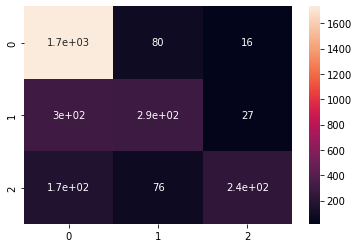

In [23]:
model1.fit(xtrain,ytrain)
pred1 = model1.predict(xtest)
print(classification_report(ytest,pred1))
cm = confusion_matrix(ytest,pred1)
print(sns.heatmap(cm,annot =True,fmt = '0.5g'))

              precision    recall  f1-score   support

    negative       0.82      0.84      0.83      1830
     neutral       0.48      0.46      0.47       616
    positive       0.61      0.60      0.60       482

    accuracy                           0.72      2928
   macro avg       0.64      0.63      0.64      2928
weighted avg       0.72      0.72      0.72      2928

AxesSubplot(0.125,0.125;0.62x0.755)


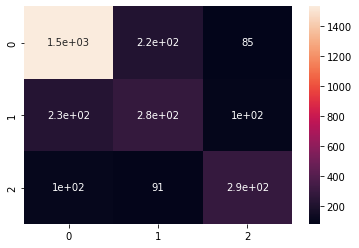

In [24]:
model2.fit(xtrain,ytrain)
pred1 = model2.predict(xtest)
print(classification_report(ytest,pred1))
cm = confusion_matrix(ytest,pred1)
print(sns.heatmap(cm,annot =True))

In [27]:
ytest.replace({'negative':0,'neutral':1,'positive':2},inplace =True)
ytrain.replace({'negative':0,'neutral':1,'positive':2},inplace =True)

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1830
           1       0.63      0.52      0.57       616
           2       0.76      0.60      0.67       482

    accuracy                           0.77      2928
   macro avg       0.73      0.67      0.70      2928
weighted avg       0.76      0.77      0.76      2928

AxesSubplot(0.125,0.125;0.62x0.755)


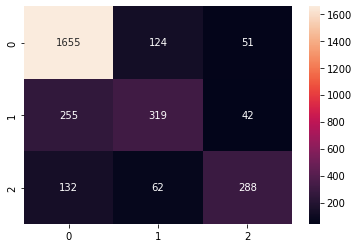

In [28]:

model3.fit(xtrain,ytrain)
pred1 = model3.predict(xtest)
print(classification_report(ytest,pred1))
cm = confusion_matrix(ytest,pred1)
print(sns.heatmap(cm,annot =True,fmt = '0.5g'))